### Schematic figure for meriodal overturning circulation experiments

Hu, A., G. A. Meehl, N. Rosenbloom, **M. J. Molina**, and G. Strand (In Press): The influence of variability in meridional overturning on global ocean circulation. Journal of Climate. [Link](https://journals.ametsoc.org/view/journals/clim/aop/JCLI-D-21-0119.1/JCLI-D-21-0119.1.xml?tab_body=abstract-display)

In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from pyproj import Proj, transform
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm, LinearSegmentedColormap, ColorConverter
import matplotlib.patheffects as path_effects
import matplotlib as mpl
from scipy.ndimage import gaussian_filter
import numpy as np
import matplotlib.colors as mcolors

In [2]:
def make_colormap(colors):

    z  = np.array(sorted(colors.keys()))
    n  = len(z)
    z1 = min(z)
    zn = max(z)
    x0 = (z - z1) / (zn - z1)

    CC = ColorConverter()
    R = []
    G = []
    B = []
    for i in range(n):
        Ci = colors[z[i]]      
        if type(Ci) == str:
            RGB = CC.to_rgb(Ci)
        else:
            RGB = Ci
        R.append(RGB[0])
        G.append(RGB[1])
        B.append(RGB[2])

    cmap_dict = {}
    cmap_dict['red']   = [(x0[i],R[i],R[i]) for i in range(len(R))]
    cmap_dict['green'] = [(x0[i],G[i],G[i]) for i in range(len(G))]
    cmap_dict['blue']  = [(x0[i],B[i],B[i]) for i in range(len(B))]
    mymap = LinearSegmentedColormap('mymap',cmap_dict)
    
    return mymap

In [3]:
def pacific_lon(longitude):
    """
    Help converting Pacific longitudes.
    
    Args:
        longitude (float): Longitude value.
    """
    if longitude <= 0:
        return longitude
    if longitude > 0:
        return longitude-360

def take_lon_mean(array):
    """
    Special longitude/latitude mean.
    """
    intermediary_value = np.nanmean([pacific_lon(array[0]), pacific_lon(array[1])])
    if intermediary_value >= -180:
        return intermediary_value
    if intermediary_value < -180:
        return intermediary_value + 360

def expand_lon_array(array):
    """
    Create array intermediary values.
    """
    return np.array([take_lon_mean(array[i:i+2]) for i in range(len(array)-1)])

def expand_lat_array(array):
    """
    Create array intermediary values.
    """
    return np.array([np.nanmean(array[i:i+2]) for i in range(len(array)-1)])

def concat_array(a1, longitude=False):
    """
    Create new array with filled intermediary values.
    """
    if longitude:
        a2 = expand_lon_array(a1)
    if not longitude:
        a2 = expand_lat_array(a1)
    newa = []; a1_count = 0; a2_count = 0
    total_a = len(a1)+len(a2)
    for i in range(total_a):
        if (i % 2) == 0:
            newa.append(a1[a1_count])
            a1_count += 1
        else:
            newa.append(a2[a2_count])
            a2_count += 1
    return np.array(newa)

In [4]:
moc_cmap = ({0.0:  'indigo',
             0.25: 'red',
             0.37: 'salmon',
             0.5:  'gold',
             0.6:  'gold',
             0.9: '#004080',
             1.0:  '#004080'})

moc_cmap = make_colormap(moc_cmap)

In [5]:
def plot_a(ax):

    ax.set_title("a) Active AMOC and Inactive PMOC", fontsize=22)

    ax.set_extent([-180, 180, -90, 90])

    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS)

    ax.text(-62, 58, 'Sinking', color='w', fontsize=12, fontweight='bold', zorder=100,
            bbox = dict(boxstyle='circle', facecolor='indigo', alpha=1., edgecolor='w'), transform=ccrs.Geodetic())

    ax.text(-14, 73, 'Sinking', color='w', fontsize=12, fontweight='bold', zorder=100,
            bbox = dict(boxstyle='circle', facecolor='indigo', alpha=1., edgecolor='w'), transform=ccrs.Geodetic())

    ax.text(-53, -65, 'Sinking', color='w', fontsize=12, fontweight='bold', zorder=100,
            bbox = dict(boxstyle='circle', facecolor='indigo', alpha=1., edgecolor='w'), transform=ccrs.Geodetic())

    #Arrows lines 
    transform = ccrs.PlateCarree()._as_mpl_transform(ax)

    ############################################# PACIFIC ############################################################################################

    ax.annotate('', xy=(145., 38.), xytext=(88., 33.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.2"))

    ax.annotate('', xy=(80., 7.), xytext=(140., 14.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.025"))

    ax.annotate('', xy=(45., -9.), xytext=(75., 6.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.05"))

    ax.annotate('', xy=(12., -21.), xytext=(42., -11.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.05"))

    ax.annotate('', xy=(-25., -31.), xytext=(7., -22.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.045"))

    ax.annotate('', xy=(-20., -46.), xytext=(-30., -32.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.5"))

    ax.annotate('', xy=(150., 18.), xytext=(150., 35.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.3"))

    ax.annotate('', xy=(85., 28.), xytext=(91, 15.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.3"))

    ax.annotate('', xy=(110., 3.), xytext=(150., -21.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.025"))

    ax.annotate('', xy=(160., -30.), xytext=(157., -50.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.2"))

    #########################################################################

    pac_lons = np.array([-134, -132, -130, -129, -128.5, -130, -132., -135, -145, -157, 168, 162, 
                         159.5, 158, 156, 155, 154.75, 156.5, 160., 165, 175, -175, -165, 
                         -155, -148.5, -142, -140, -138, -137.5, -139, -142, -146, -150, -160, -170, 
                         155, 145, 140, 130, 110, 100, 90, 80, 70, 60, 50, 45, 40, 39, 40, 42, 44, 48, 52])

    pac_lats = np.array([-55, -50, -45, -40, -36, -32, -29, -26, -18, -10, 10, 13, 15, 17, 20, 23, 
                         26, 31, 34, 36.5, 39.5, 41, 41, 40, 38.5, 36, 34, 30, 25, 20, 
                         17, 15.5, 14, 12, 11, 8, 5.75, 4, 0, -12, -16, -19, -21, -23, 
                         -25.5, -28.5, -30.5, -32, -36, -40, -42, -44, -46.5, -49])

    pac_mocs = np.array([0,0,0,0,0,0,0,0,0,0.,0.,0.,0,2,2.,2.,2,2.,2.,2.,2.,3,5,4,3.5,3.,2.5,
                         1.5,1.5,1.,1.,1,1,1,1,1,1,0.5,0.5,1,1,1,2,2,2,2,2,2,2,3,3,3,13])

    x = concat_array(pac_lons,longitude=True)
    y = concat_array(pac_lats,longitude=False)
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-3], points[3:]], axis=1)
    norm = plt.Normalize(0,5)
    lc = LineCollection(segments, cmap=moc_cmap, norm=norm, alpha=0.95, transform=ccrs.Geodetic())
    lc.set_array(gaussian_filter(concat_array(pac_mocs),6))
    lc.set_linewidth(20)
    lc.set_zorder(10)
    line = ax.add_collection(lc)

    ################################## ANTARCTIC #####################################################################################################

    ax.annotate('', xy=(180., -57.), xytext=(150., -57.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.05"))

    ax.annotate('', xy=(180., -62.-3), xytext=(150., -62.-3), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.05"))

    ax.annotate('', xy=(130., -57.), xytext=(60., -52.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.05"))

    ax.annotate('', xy=(130., -62.75-3), xytext=(60., -57.5-3), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.05"))

    ax.annotate('', xy=(30., -50.), xytext=(-90., -55.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.05"))

    ax.annotate('', xy=(30., -55.-3), xytext=(-90., -60.-3), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.05"))

    ax.annotate('', xy=(-130., -59.), xytext=(-170., -59.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.01"))

    ax.annotate('', xy=(-130., -63.-3), xytext=(-170., -64.-3), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.01"))

    #########################################################################

    ant_lons = np.array([-110,-105,-100,-95,-90,-85,-80,-75,-70,-65,-60,-55,-50,-45,-40,-35,-30,-25,
                         -20,-15,-10,-5,0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,
                           95,100,105,110,115,120,125,130,135,140,145,150,155,160,165,170,175,180])

    ant_lats = np.array([-60,-60,-59.5,-59.5,-59,-59,-59,-59,-59,-59,-59,-59,-58.75,-58.5,-58.25,-57.75,-57.,-56, -55.25,
                         -54.5,-54.,-53.25,-52.75,-52.,-51.5,-51.25,-51,-50.5,-50,-49.5,-49.5,
                         -49.5,-49.5,-49.25,-49.25,-49.25,-49.5,-49.5,-49.5,-49.5,-49.75,-49.75,-50,-50.5,-51,
                         -51,-51.5,-52.25,-53,-53.75,-54.5,-55.25,-55.75,-56.5,-57,-57.25,-57.5,-57.75,-57.75])

    anttop_mocs = np.array([5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,
                            5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5])

    x = concat_array(ant_lons,longitude=False)
    y = concat_array(ant_lats,longitude=False)
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-3], points[3:]], axis=1)
    norm = plt.Normalize(0,5)
    lc = LineCollection(segments, cmap=moc_cmap, norm=norm, alpha=0.95, transform=ccrs.Geodetic())
    lc.set_array(concat_array(anttop_mocs))
    lc.set_linewidth(20)
    lc.set_zorder(10)
    line = ax.add_collection(lc)

    #########################################################################

    ant_lons2 = np.array([-179.99, -175,-170,-165,-160, -155, -150, -145, -140, 
                          -135, -130, -125, -120, -115, -110.01])

    ant_lats2 = np.array([-57.75, -57.75,-57.75,-57.5,-57.25, -57.25, -57.25, -57.25, 
                          -57.25, -56.75, -56.5, -56.25, -56.25, -56.25, -56.25])

    anttop_mocs2 = np.array([5,5,5,5,5,5,5,4.75,4.75,4.75,4.75,4.75,5])

    x = concat_array(ant_lons2,longitude=True)
    y = concat_array(ant_lats2,longitude=False)
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-3], points[3:]], axis=1)
    norm = plt.Normalize(0,5)
    lc = LineCollection(segments, cmap=moc_cmap, norm=norm, alpha=0.95, transform=ccrs.Geodetic())
    lc.set_array(concat_array(anttop_mocs2))
    lc.set_linewidth(20)
    lc.set_zorder(10)
    line = ax.add_collection(lc)

    #########################################################################

    antbot_mocs = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                            0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])

    x = concat_array(ant_lons,longitude=False)
    y = concat_array(ant_lats-5,longitude=False)
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-3], points[3:]], axis=1)
    norm = plt.Normalize(0,5)
    lc = LineCollection(segments, cmap=moc_cmap, norm=norm, alpha=0.95, transform=ccrs.Geodetic())
    lc.set_array(concat_array(antbot_mocs))
    lc.set_linewidth(25)
    lc.set_zorder(9)
    line = ax.add_collection(lc)

    #########################################################################

    antbot_mocs2 = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0])

    x = concat_array(ant_lons2,longitude=True)
    y = concat_array(ant_lats2-5,longitude=False)
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-3], points[3:]], axis=1)
    norm = plt.Normalize(0,5)
    lc = LineCollection(segments, cmap=moc_cmap, norm=norm, alpha=0.95, transform=ccrs.Geodetic())
    lc.set_array(concat_array(antbot_mocs2))
    lc.set_linewidth(25)
    lc.set_zorder(9)
    line = ax.add_collection(lc)

    ############################ ANTARCTIC TO INDIAN OCEAN ###########################################################################################

    ax.annotate('', xy=(-28., -16.), xytext=(-35., -26.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.075"))
    
    ax.annotate('', xy=(-15., -2.5), xytext=(-26., -15.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.25"))

    ax.annotate('', xy=(15., -2.), xytext=(-10., -1.5), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.15"))

    ax.annotate('', xy=(13., -16.), xytext=(19., -7.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.15"))

    ax.annotate('', xy=(-62., -25.), xytext=(-47., -39.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.3"))

    #########################################################################

    ind_lons = np.array([14,17,20,22,23,25,27,29,31,32.5,34,35,37,38,39,41,42,43,44,45,46,
                         47,48,49.,50.,51,52,53,54.5,56,58,60,62,64,66,68,70,72,74,76,78,80,84,
                         87,88,89,89,89,88,84,
                         80,75,69,59,49,40,35,30,25.,20,15,13,11,9.75,8.5,8.25
                        ])

    ind_lats = np.array([-48,-44,-41,-39,-37.5,-36,-34,-32,-30,-28,-26,-25,-22,-20,-17,-15,-13,-11,-9,-7,-5,
                         -3,-2,-1,-0.5,0,0.5,1.,1.5,2.,2.5,3.,3.5,4,4.25,4.5,4.5,4.5,4.5,4.5,4.5,4.25,4.,
                         2,0.,-2,-3.,-5,-7.5,-11,
                         -14.,-16,-18,-21,-24,-27,-29,-32,-33.5,-34,-33,-31,-25,-22.5,-20,-18
                        ])

    ind_mocs = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1.,1.,1,1.,1.,1.,1.,1.,1,1.,1.,1.,
                         1.,1.,1.,1.,1,1,1,1,1,1,1,1,1,1,1.,1.,
                         1,1,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3
                        ])

    x = concat_array(ind_lons,longitude=False)
    y = concat_array(ind_lats-5,longitude=False)
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-3], points[3:]], axis=1)
    norm = plt.Normalize(0,5)
    lc = LineCollection(segments, cmap=moc_cmap, norm=norm, alpha=0.95, transform=ccrs.Geodetic())
    lc.set_array(gaussian_filter(concat_array(ind_mocs),6))
    lc.set_linewidth(20)
    lc.set_zorder(9)
    line = ax.add_collection(lc)
    
    #for i, j in zip(ind_lons, ind_lats-5):
    #    ax.scatter(i,j,color='k',zorder=1000,transform=ccrs.Geodetic())

    #################################### SOUTH AFRICA TO ATLANTIC ####################################################################################

    ax.annotate('', xy=(-95., 3.), xytext=(-66., -15.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.2"))

    ax.annotate('', xy=(-130., 17.), xytext=(-110., 7.5), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.05"))

    ax.annotate('', xy=(-140., 35.), xytext=(-140., 24.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.7"))

    ax.annotate('', xy=(-120., 40.), xytext=(-135., 38.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.1"))

    ax.annotate('', xy=(-95., 45.), xytext=(-115., 40.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.1"))

    ax.annotate('', xy=(-75., 62.), xytext=(-90., 50.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.05"))

    #########################################################################

    atl_lons = np.array([8.25,8,7.5,7.,5.5,4,2,0,-2,-5,-7.5,-10,-14,-18,
                         -22,-26,-30,-35,-40,-45,-50,-55,-60,
                         -65.5,-68,-70,-72,-74,-74,-72,-69,-61.5,-50,-45,-40,-35,
                        -30,-25,-20,-15,-10,-5,0,5,10,11,10,5])

    atl_lats = np.array([-25,-23,-21,-19,-17,-15,-12,-10,-8,-6,-4,-2,0,2,3.,4,5,6,7,8.5,11,
                         13.5,16,20.25,22,24,26,28,31,34,36,39,40,40,40.5,41.5,43,
                        45,50,55,59,62,64,66,69,72,75,76])

    atl_mocs = np.array([3,3,3,2,2,2,2,2,2,2,2,2,1.5,1,1,1,1,1,1,1,1,1,1,1,1,1,
                         2,2,2,2,2,2,2,2,2,3,3,3,4,4,4,4,4,4,4,4,4,10])

    x = concat_array(atl_lons,longitude=False)
    y = concat_array(atl_lats,longitude=False)
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-3], points[3:]], axis=1)
    norm = plt.Normalize(0,5)
    lc = LineCollection(segments, cmap=moc_cmap, norm=norm, alpha=0.95, transform=ccrs.Geodetic())
    lc.set_array(gaussian_filter(concat_array(atl_mocs),6))
    lc.set_linewidth(20)
    lc.set_zorder(9)
    line = ax.add_collection(lc)
    
    #for i, j in zip(atl_lons, atl_lats):
    #    ax.scatter(i,j,zorder=1000,transform=ccrs.Geodetic())

    #################### ATLANTIC DEEP WATER #########################################################################################################

    ax.annotate('', xy=(-114., 16), xytext=(-133., 28.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.1"))

    ax.annotate('', xy=(-107., -23.), xytext=(-102.5, 0.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.25"))

    ax.annotate('', xy=(-123., -40.), xytext=(-112., -30.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.05"))

    ax.annotate('', xy=(-122., -53.), xytext=(-125., -42.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.25"))

    #########################################################################

    satl_lons = np.array([-49.5,-49.5,-49.25,-49.25,-49,-49,-49.5,-51,-54,-59,-66,-70,-71,-70,-66,-62,-57,
                          -50,-44,-36,-33,-32,-31,-31,-32,-34,-36,-40,-44,-48,-52,-56,-57,-56,-53,-49])

    satl_lats = np.array([55,54,53,53,52,50,49,46,43,42,40,37,34,32,28,24,20,16,12,8,4,
                          0,-4,-8,-13,-18,-22,-27,-31,-35,-38,-42,-46,-50,-54,-58])

    satl_mocs = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])

    x = concat_array(satl_lons,longitude=False)
    y = concat_array(satl_lats,longitude=False)
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-3], points[3:]], axis=1)
    norm = plt.Normalize(0,5)
    lc = LineCollection(segments, cmap=moc_cmap, norm=norm, alpha=0.95, transform=ccrs.Geodetic())
    lc.set_array(concat_array(satl_mocs))
    lc.set_linewidth(20)
    lc.set_zorder(7)
    line = ax.add_collection(lc)

    ################### ICELAND TO NORTH ATLANTIC ####################################################################################################

    natl_lons = np.array([-4,-6,-8,-11,-14,-18,-23,-28,-32,-36,-44,-47,-49])

    natl_lats = np.array([70,68,65,62,59,56,53,50,48,46,44,43,42.5])

    natl_mocs = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0])

    x = concat_array(natl_lons,longitude=False)
    y = concat_array(natl_lats,longitude=False)
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-3], points[3:]], axis=1)
    norm = plt.Normalize(0,5)
    lc = LineCollection(segments, cmap=moc_cmap, norm=norm, alpha=0.95, transform=ccrs.Geodetic())
    lc.set_array(concat_array(natl_mocs))
    lc.set_linewidth(20)
    lc.set_zorder(7)
    line = ax.add_collection(lc)

    ################## GREENLAND TO NORTH ATLANTIC ###################################################################################################

    ax.annotate('', xy=(-97, 69.75), xytext=(-85., 71.75), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.025"))

    #########################################################################

    green_lons = np.array([-4,-7,-11,-16,-21,-26,-30,-35,-38,-39,-40,-41,-41.5,-42,-42.5])

    green_lats = np.array([72,71,70,69,68,67,66,64,61,58,55,52,50,48,46])

    green_mocs = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0])

    x = concat_array(green_lons,longitude=False)
    y = concat_array(green_lats,longitude=False)
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-3], points[3:]], axis=1)
    norm = plt.Normalize(0,5)
    lc = LineCollection(segments, cmap=moc_cmap, norm=norm, alpha=0.95, transform=ccrs.Geodetic())
    lc.set_array(concat_array(green_mocs))
    lc.set_linewidth(20)
    lc.set_zorder(7)
    line = ax.add_collection(lc)

    ########################## NORTH ATLANTIC TO GREENLAND ###########################################################################################

    ax.annotate('', xy=(-90., 60.), xytext=(-94., 49.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.2"))

    ax.annotate('', xy=(-102., 65.5), xytext=(-92., 61), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.2"))

    #########################################################################

    ice_lons = np.array([-28, -25, -22, -21, -21, -22, -24, -26, -29, -31, -34, -37.5,-40,-43,-45,-47,-49])

    ice_lats = np.array([44, 48, 52, 55, 58, 62, 63, 64, 65, 65, 64, 62,60,58,58,58,58])

    ice_mocs = np.array([3,3,3,3,4,4,4,4.5,4.75,4.75,4.75,4.75,5,5,5,5,5])

    x = concat_array(ice_lons,longitude=False)
    y = concat_array(ice_lats,longitude=False)
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-3], points[3:]], axis=1)
    norm = plt.Normalize(0,5)
    lc = LineCollection(segments, cmap=moc_cmap, norm=norm, alpha=0.95, transform=ccrs.Geodetic())
    lc.set_array(gaussian_filter(concat_array(ice_mocs),6))
    lc.set_linewidth(20)
    lc.set_zorder(7)
    line = ax.add_collection(lc)

    #########################################################################

    ax.stock_img()

    #########################################################################

In [6]:
def plot_b(ax):

    ax.set_title("b) Inactive AMOC and Inactive PMOC", fontsize=22)

    ax.set_extent([-180, 180, -90, 90])

    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS)

    ax.text(-53, -65, 'Sinking', color='w', fontsize=12, fontweight='bold', zorder=100,
            bbox = dict(boxstyle='circle', facecolor='indigo', alpha=1., edgecolor='w'), transform=ccrs.Geodetic())

    #Arrows lines 
    transform = ccrs.PlateCarree()._as_mpl_transform(ax)

    ############################################# PACIFIC ############################################################################################

    ax.annotate('', xy=(145., 38.), xytext=(88., 33.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.2"))

    ax.annotate('', xy=(80., 7.), xytext=(140., 14.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.025"))

    ax.annotate('', xy=(45., -9.), xytext=(75., 6.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.05"))

    ax.annotate('', xy=(12., -21.), xytext=(42., -11.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.05"))

    ax.annotate('', xy=(-25., -31.), xytext=(7., -22.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.045"))

    ax.annotate('', xy=(-20., -46.), xytext=(-30., -32.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.5"))

    ax.annotate('', xy=(150., 18.), xytext=(150., 35.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.3"))

    ax.annotate('', xy=(85., 28.), xytext=(91, 15.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.3"))

    ax.annotate('', xy=(110., 3.), xytext=(150., -21.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.025"))

    ax.annotate('', xy=(160., -30.), xytext=(157., -50.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.2"))

    #########################################################################

    pac_lons = np.array([-134, -132, -130, -129, -128.5, -130, -132., -135, -145, -157, 168, 162, 
                         159.5, 158, 156, 155, 154.75, 156.5, 160., 165, 175, -175, -165, 
                         -155, -148.5, -142, -140, -138, -137.5, -139, -142, -146, -150, -160, -170, 
                         155, 145, 140, 130, 110, 100, 90, 80, 70, 60, 50, 45, 40, 39, 40, 42, 44, 48, 52])

    pac_lats = np.array([-55, -50, -45, -40, -36, -32, -29, -26, -18, -10, 10, 13, 15, 17, 20, 23, 
                         26, 31, 34, 36.5, 39.5, 41, 41, 40, 38.5, 36, 34, 30, 25, 20, 
                         17, 15.5, 14, 12, 11, 8, 5.75, 4, 0, -12, -16, -19, -21, -23, 
                         -25.5, -28.5, -30.5, -32, -36, -40, -42, -44, -46.5, -49])

    pac_mocs = np.array([0,0,0,0,0,0,0,0,0,0.,0.,0.,0,2,2.,2.,2,2.,3.5,4,5,5,5,4,3.5,3.,2.5,
                         1.5,1.5,1.,1.,1,1,1,1,1,1,0.5,0.5,1,1,1,2,2,2,2,2,2,2,3,3,3,13])

    x = concat_array(pac_lons,longitude=True)
    y = concat_array(pac_lats,longitude=False)
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-3], points[3:]], axis=1)
    norm = plt.Normalize(0,5)
    lc = LineCollection(segments, cmap=moc_cmap, norm=norm, alpha=0.95, transform=ccrs.Geodetic())
    lc.set_array(gaussian_filter(concat_array(pac_mocs),6))
    lc.set_linewidth(20)
    lc.set_zorder(10)
    line = ax.add_collection(lc)

    ################################## ANTARCTIC #####################################################################################################

    ax.annotate('', xy=(180., -57.), xytext=(150., -57.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.05"))

    ax.annotate('', xy=(180., -62.-3), xytext=(150., -62.-3), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.05"))

    ax.annotate('', xy=(130., -57.), xytext=(60., -52.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.05"))

    ax.annotate('', xy=(130., -62.75-3), xytext=(60., -57.5-3), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.05"))

    ax.annotate('', xy=(30., -50.), xytext=(-90., -55.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.05"))

    ax.annotate('', xy=(30., -55.-3), xytext=(-90., -60.-3), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.05"))

    ax.annotate('', xy=(-130., -59.), xytext=(-170., -59.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.01"))

    ax.annotate('', xy=(-130., -63.-3), xytext=(-170., -64.-3), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.01"))

    #########################################################################

    ant_lons = np.array([-110,-105,-100,-95,-90,-85,-80,-75,-70,-65,-60,-55,-50,-45,-40,-35,-30,-25,
                         -20,-15,-10,-5,0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,
                           95,100,105,110,115,120,125,130,135,140,145,150,155,160,165,170,175,180])

    ant_lats = np.array([-60,-60,-59.5,-59.5,-59,-59,-59,-59,-59,-59,-59,-59,-58.75,-58.5,-58.25,-57.75,-57.,-56, -55.25,
                         -54.5,-54.,-53.25,-52.75,-52.,-51.5,-51.25,-51,-50.5,-50,-49.5,-49.5,
                         -49.5,-49.5,-49.25,-49.25,-49.25,-49.5,-49.5,-49.5,-49.5,-49.75,-49.75,-50,-50.5,-51,
                         -51,-51.5,-52.25,-53,-53.75,-54.5,-55.25,-55.75,-56.5,-57,-57.25,-57.5,-57.75,-57.75])

    anttop_mocs = np.array([5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,
                            5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5])

    x = concat_array(ant_lons,longitude=False)
    y = concat_array(ant_lats,longitude=False)
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-3], points[3:]], axis=1)
    norm = plt.Normalize(0,5)
    lc = LineCollection(segments, cmap=moc_cmap, norm=norm, alpha=0.95, transform=ccrs.Geodetic())
    lc.set_array(concat_array(anttop_mocs))
    lc.set_linewidth(20)
    lc.set_zorder(31)
    line = ax.add_collection(lc)

    #########################################################################

    ant_lons2 = np.array([-179.99, -175,-170,-165,-160, -155, -150, -145, -140, 
                          -135, -130, -125, -120, -115, -110.01])

    ant_lats2 = np.array([-57.75, -57.75,-57.75,-57.5,-57.25, -57.25, -57.25, -57.25, 
                          -57.25, -56.75, -56.5, -56.25, -56.25, -56.25, -56.25])

    anttop_mocs2 = np.array([5,5,5,5,5,5,5,4.75,4.75,4.75,4.75,4.75,5])

    x = concat_array(ant_lons2,longitude=True)
    y = concat_array(ant_lats2,longitude=False)
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-3], points[3:]], axis=1)
    norm = plt.Normalize(0,5)
    lc = LineCollection(segments, cmap=moc_cmap, norm=norm, alpha=0.95, transform=ccrs.Geodetic())
    lc.set_array(concat_array(anttop_mocs2))
    lc.set_linewidth(20)
    lc.set_zorder(31)
    line = ax.add_collection(lc)

    #########################################################################

    antbot_mocs = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                            0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])

    x = concat_array(ant_lons,longitude=False)
    y = concat_array(ant_lats-5,longitude=False)
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-3], points[3:]], axis=1)
    norm = plt.Normalize(0,5)
    lc = LineCollection(segments, cmap=moc_cmap, norm=norm, alpha=0.95, transform=ccrs.Geodetic())
    lc.set_array(concat_array(antbot_mocs))
    lc.set_linewidth(25)
    lc.set_zorder(10)
    line = ax.add_collection(lc)

    #########################################################################

    antbot_mocs2 = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0])

    x = concat_array(ant_lons2,longitude=True)
    y = concat_array(ant_lats2-5,longitude=False)
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-3], points[3:]], axis=1)
    norm = plt.Normalize(0,5)
    lc = LineCollection(segments, cmap=moc_cmap, norm=norm, alpha=0.95, transform=ccrs.Geodetic())
    lc.set_array(concat_array(antbot_mocs2))
    lc.set_linewidth(25)
    lc.set_zorder(10)
    line = ax.add_collection(lc)
    
    ############################ ANTARCTIC TO INDIAN OCEAN ###########################################################################################

    ax.annotate('', xy=(-28., -16.), xytext=(-35., -26.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.075"))
    
    ax.annotate('', xy=(-15., -2.5), xytext=(-26., -15.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.25"))

    ax.annotate('', xy=(15., -2.), xytext=(-10., -1.5), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.15"))

    ax.annotate('', xy=(13., -16.), xytext=(19., -7.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.15"))

    ax.annotate('', xy=(-71., -21), xytext=(-45., -39.5), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.3"))

    ax.annotate('', xy=(-96., -20), xytext=(-77., -20), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.3"))

    #########################################################################

    ind_lons = np.array([14,17,20,22,23,25,27,29,31,32.5,34,35,37,38,39,41,42,43,
                        44,45,46,47,48,49.,50.,51,52,53,54.5,56,58,60,62,64,66,68,70,72,74,76,78,80,84,
                        87,88,89,89,89,88,84,80,
                        75,69,59,49,40,30,20,17.5,15,13,8,5,2,0,-4,-10,-15,-20,-26,-29,-32])

    ind_lats = np.array([-48,-44,-41,-39,-37.5,-36,-34,-32,-30,-28,-26,-25,-22,-20,-17,-15,-13,-11,-9,-7,-5,
                         -3,-2,-1,-0.5,0,0.5,1.,1.5,2.,2.5,3.,3.5,4,4.25,4.5,4.5,4.5,4.5,4.5,4.5,4.25,4.,
                         2,0.,-2,-3.,-5,-7.5,-11,-13.,-15,-17,-21,-24,-28,-32,
                         -34,-33.5,-32.5,-31.75,-28,-25,-22,-19,-15,-13,-11,-11,-13,-15,-20])

    ind_mocs = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1.,1.,1,1.,1.,1.,1.,1.,1,1.,1.,1.,
                         1.,1.,1.,1.,1,1,1,1,1,1,1,1,1,1,1.,1.,1.,1,2.,2.,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3])

    x = concat_array(ind_lons,longitude=False)
    y = concat_array(ind_lats-5,longitude=False)
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-3], points[3:]], axis=1)
    norm = plt.Normalize(0,5)
    lc = LineCollection(segments, cmap=moc_cmap, norm=norm, alpha=0.95, transform=ccrs.Geodetic())
    lc.set_array(gaussian_filter(concat_array(ind_mocs),6))
    lc.set_linewidth(20)
    lc.set_zorder(19)
    line = ax.add_collection(lc)

    ############################### ATLANTIC #########################################################################################################

    ax.annotate('', xy=(-80., -24.), xytext=(-92., -48.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.25"))

    ax.annotate('', xy=(-97., 10.), xytext=(-83., -10.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.01"))

    ax.annotate('', xy=(-99., 35.), xytext=(-100., 17.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.1"))

    ax.annotate('', xy=(-125., 39.), xytext=(-102., 39.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.1"))

    ax.annotate('', xy=(-120., 15.), xytext=(-127., 33.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.2"))

    ax.annotate('', xy=(-100., -20.), xytext=(-110., 5.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.4"))

    ax.annotate('', xy=(-119., -40.), xytext=(-102., -25.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.0"))

    ax.annotate('', xy=(-125., -56.), xytext=(-123., -43.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.5"))

    #########################################################################

    atl_lons = np.array([-31,-28,-25,-22,-19,-16,-13,-10,-9,-9.5,-10,-13,-16,-20,-24,-28])
    
    atl_lons2 = np.array([-20,-24,-28,-30,-31,-31,-30,-29,-30,-31,-32,-33,-35,-38,-42,-46,-50,-52,-53,-54,-55,-56,-57,-57.25,-57.5,-57.75,-57.5,-56.5,
                          -54,-50,-46,-42,-36,-32,-29,-28,-28,-29,-32,-37,-43,-49,-55,-57,-58.25,-58.5,-58.5,-58.25,-57.5,-56.5,-55,-52])

    atl_lats = np.array([-53,-50,-47,-44,-41,-37,-32,-26,-20,-15,-10,-5,0,5,10,15])
    
    atl_lats2 = np.array([5,10,15,20,25,30,35,40,42,43,44,44.5,45.25,45.5,45.5,45.5,45.25,45,44.5,44,43.,42,41,40,39,36,32,
                          28,24,20,16,12,8,4,0,-4,-10,-15,-20,-25,-30,-35,-40,-42,-44,-45,-46,-47,-48,-49,-50,-52])

    atl_mocs = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
    
    atl_mocs2 = np.array([-2,-2,-2,-2,4,3,3,3,3,4,4,4,4,4.75,4,4,4,4,3.5,3.5,3.25,3,3,2.75,2.75,2.5,2.5,2.25,2.,
                          1,1,1,0.5,0.5,0.5,3,3,3,3,3,3,3,3,4,4,4,5,5,5,5,5,5])

    x = concat_array(atl_lons,longitude=False)
    y = concat_array(atl_lats-5,longitude=False)
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-3], points[3:]], axis=1)
    norm = plt.Normalize(0,5)
    lc = LineCollection(segments, cmap=moc_cmap, norm=norm, alpha=0.95, transform=ccrs.Geodetic())
    lc.set_array(gaussian_filter(concat_array(atl_mocs),6))
    lc.set_linewidth(20)
    lc.set_zorder(10)
    line = ax.add_collection(lc)
    
    x = concat_array(atl_lons2,longitude=False)
    y = concat_array(atl_lats2-5,longitude=False)
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-3], points[3:]], axis=1)
    norm = plt.Normalize(0,5)
    lc = LineCollection(segments, cmap=moc_cmap, norm=norm, alpha=0.95, transform=ccrs.Geodetic())
    lc.set_array(gaussian_filter(concat_array(atl_mocs2),6))
    lc.set_linewidth(20)
    lc.set_zorder(9)
    line = ax.add_collection(lc)

    #########################################################################

    #for i, j in zip(ind_lons, ind_lats-5):
    #    ax.scatter(i,j,zorder=1000,transform=ccrs.Geodetic())

    ax.stock_img()
    
    #########################################################################

In [7]:
def plot_c(ax):

    ax.set_title("c) Inactive AMOC and Active PMOC", fontsize=22)
    
    ax.set_extent([-180, 180, -90, 90])

    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS)

    # sinking labels
    ax.text(176, 49, 'Sinking', color='w', fontsize=12, fontweight='bold', zorder=100,
            bbox = dict(boxstyle='circle', facecolor='indigo', alpha=1., edgecolor='w'), transform=ccrs.Geodetic())

    ax.text(-53, -65, 'Sinking', color='w', fontsize=12, fontweight='bold', zorder=100,
            bbox = dict(boxstyle='circle', facecolor='indigo', alpha=1., edgecolor='w'), transform=ccrs.Geodetic())

    #Arrows lines 
    transform = ccrs.PlateCarree()._as_mpl_transform(ax)

    ############################################# PACIFIC ############################################################################################

    ax.annotate('', xy=(110., -4.), xytext=(150., -22.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.1"))

    ax.annotate('', xy=(160., -30.), xytext=(155., -45.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.4"))

    ax.annotate('', xy=(70., 10.), xytext=(100., -1.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.05"))

    ax.annotate('', xy=(62., 0.), xytext=(100., -1.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.15"))

    ax.annotate('', xy=(105., 37), xytext=(77., 33.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.05"))

    ax.annotate('', xy=(90., 43.), xytext=(105., 46), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.075"))
    
    ax.annotate('', xy=(75., 14.), xytext=(75., 25), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.075"))

    ax.annotate('', xy=(67.5, 28), xytext=(66., 13.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.3"))

    ax.annotate('', xy=(110., -30.), xytext=(88., -10), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.05"))

    ax.annotate('', xy=(118., -52.), xytext=(115., -38), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.3"))

    pac_lons = np.array([-154, -148, -141, -134, -129, -128.5, -130, -132, -135, -140, -145, -150, -160, -170, 180, 174, 168, 
                         162, 156, 150, 144, 140, 130, 110, 100, 90, 80, 70, 60, 50, 45, 43, 42, 43, 47, 53])

    pac_lats = np.array([-58, -55, -50, -45, -40, -36, -32, -29, -26, -22, -18, -15, -10, -7, -4, -2, -0.5, 0.5, 1.75, 2.25, 2.25, 2., 
                         -1, -10, -15, -18, -20, -22, -25, -29, -32, -35, -38, -42, -46, -49])

    pac_mocs = np.array([6,5,5,4,3,3,3,3,3,2,2,1,1,1,1,0.5,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,4,14])

    x = concat_array(pac_lons,longitude=True)
    y = concat_array(pac_lats,longitude=False)
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-3], points[3:]], axis=1)
    norm = plt.Normalize(0,5)
    lc = LineCollection(segments, cmap=moc_cmap, norm=norm, alpha=0.95, transform=ccrs.Geodetic())
    lc.set_array(gaussian_filter(concat_array(pac_mocs),6))
    lc.set_linewidth(20)
    lc.set_zorder(10)
    line = ax.add_collection(lc)

    #########################################################################

    norpac_lons = np.array([166,160,154,148,142,136,135,134,134,134,135,137,140,144,150,160,170,180,-170,-165,-163,-162,-162,-163,-164])

    norpac_lats = np.array([0,2,4,6,9,14,16,18,20,22,24,26,29,32,34,36,37,38,39,41,44,46,48,50,51])

    norpac_mocs = np.array([1,1,1,1,1,1,1,1,1,2,2,2,2,3,3,3,3,3.5,4,4,5,6,6,10,10])

    x = concat_array(norpac_lons,longitude=True)
    y = concat_array(norpac_lats,longitude=False)
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-3], points[3:]], axis=1)
    norm = plt.Normalize(0,5)
    lc = LineCollection(segments, cmap=moc_cmap, norm=norm, alpha=0.95, transform=ccrs.Geodetic())
    lc.set_array(gaussian_filter(concat_array(norpac_mocs),6))
    lc.set_linewidth(20)
    lc.set_zorder(11)
    line = ax.add_collection(lc)

    #########################################################################

    newpac_lons = np.array([180,172,165,160,155,150,145,143,142,142,143,145,147,
                            151,158,163,165,168,171,174,180,-177.5,-175,-175,-175,-176,-176,-175,-174,-170,-165])

    newpac_lats = np.array([46,45,43,41,39,36,32,28,23,18,12,8,4,-1,-10,-15,-17.5,-20,-22.5,-25,-30,-32.5,-35,-37.5,
                            -40,-42.5,-45,-47.5,-50,-55,-58])

    newpac_mocs = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])

    x = concat_array(newpac_lons,longitude=True)
    y = concat_array(newpac_lats,longitude=False)
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-3], points[3:]], axis=1)
    norm = plt.Normalize(0,5)
    lc = LineCollection(segments, cmap=moc_cmap, norm=norm, alpha=0.95, transform=ccrs.Geodetic())
    lc.set_array(concat_array(newpac_mocs))
    lc.set_linewidth(20)
    lc.set_zorder(9)
    line = ax.add_collection(lc)

    ################################## ANTARCTIC #####################################################################################################

    ax.annotate('', xy=(180., -57.), xytext=(150., -57.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.05"))

    ax.annotate('', xy=(180., -62.-3), xytext=(150., -62.-3), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.05"))

    ax.annotate('', xy=(130., -57.), xytext=(60., -52.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.05"))

    ax.annotate('', xy=(130., -62.75-3), xytext=(60., -57.5-3), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.05"))

    ax.annotate('', xy=(30., -50.), xytext=(-90., -55.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.05"))

    ax.annotate('', xy=(30., -55.-3), xytext=(-90., -60.-3), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.05"))

    ax.annotate('', xy=(-130., -59.), xytext=(-170., -59.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.01"))

    ax.annotate('', xy=(-130., -63.-3), xytext=(-170., -64.-3), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.01"))

    #########################################################################

    ant_lons = np.array([-110,-105,-100,-95,-90,-85,-80,-75,-70,-65,-60,-55,-50,-45,-40,-35,-30,-25,
                         -20,-15,-10,-5,0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,
                           95,100,105,110,115,120,125,130,135,140,145,150,155,160,165,170,175,180])

    ant_lats = np.array([-60,-60,-59.5,-59.5,-59,-59,-59,-59,-59,-59,-59,-59,-58.75,-58.5,-58.25,-57.75,-57.,-56, -55.25,
                         -54.5,-54.,-53.25,-52.75,-52.,-51.5,-51.25,-51,-50.5,-50,-49.5,-49.5,
                         -49.5,-49.5,-49.25,-49.25,-49.25,-49.5,-49.5,-49.5,-49.5,-49.75,-49.75,-50,-50.5,-51,
                         -51,-51.5,-52.25,-53,-53.75,-54.5,-55.25,-55.75,-56.5,-57,-57.25,-57.5,-57.75,-57.75])

    anttop_mocs = np.array([5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,
                            5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5])

    x = concat_array(ant_lons,longitude=False)
    y = concat_array(ant_lats,longitude=False)
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-3], points[3:]], axis=1)
    norm = plt.Normalize(0,5)
    lc = LineCollection(segments, cmap=moc_cmap, norm=norm, alpha=0.95, transform=ccrs.Geodetic())
    lc.set_array(concat_array(anttop_mocs))
    lc.set_linewidth(20)
    lc.set_zorder(31)
    line = ax.add_collection(lc)

    #########################################################################

    ant_lons2 = np.array([-179.99, -175,-170,-165,-160, -155, -150, -145, -140, 
                          -135, -130, -125, -120, -115, -110.01])

    ant_lats2 = np.array([-57.75, -57.75,-57.75,-57.5,-57.25, -57.25, -57.25, -57.25, 
                          -57.25, -56.75, -56.5, -56.25, -56.25, -56.25, -56.25])

    anttop_mocs2 = np.array([5,5,5,5,5,5,5,4.75,4.75,4.75,4.75,4.75,5])

    x = concat_array(ant_lons2,longitude=True)
    y = concat_array(ant_lats2,longitude=False)
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-3], points[3:]], axis=1)
    norm = plt.Normalize(0,5)
    lc = LineCollection(segments, cmap=moc_cmap, norm=norm, alpha=0.95, transform=ccrs.Geodetic())
    lc.set_array(concat_array(anttop_mocs2))
    lc.set_linewidth(20)
    lc.set_zorder(31)
    line = ax.add_collection(lc)

    #########################################################################

    antbot_mocs = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                            0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])

    x = concat_array(ant_lons,longitude=False)
    y = concat_array(ant_lats-5,longitude=False)
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-3], points[3:]], axis=1)
    norm = plt.Normalize(0,5)
    lc = LineCollection(segments, cmap=moc_cmap, norm=norm, alpha=0.95, transform=ccrs.Geodetic())
    lc.set_array(concat_array(antbot_mocs))
    lc.set_linewidth(25)
    lc.set_zorder(10)
    line = ax.add_collection(lc)

    #########################################################################

    antbot_mocs2 = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0])

    x = concat_array(ant_lons2,longitude=True)
    y = concat_array(ant_lats2-5,longitude=False)
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-3], points[3:]], axis=1)
    norm = plt.Normalize(0,5)
    lc = LineCollection(segments, cmap=moc_cmap, norm=norm, alpha=0.95, transform=ccrs.Geodetic())
    lc.set_array(concat_array(antbot_mocs2))
    lc.set_linewidth(25)
    lc.set_zorder(10)
    line = ax.add_collection(lc)

    ############################ ANTARCTIC TO INDIAN OCEAN ###########################################################################################

    ax.annotate('', xy=(-28., -16.), xytext=(-35., -26.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.075"))
    
    ax.annotate('', xy=(-15., -2.5), xytext=(-26., -15.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.25"))

    ax.annotate('', xy=(15., -2.), xytext=(-10., -1.5), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.15"))

    ax.annotate('', xy=(13., -16.), xytext=(19., -7.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.15"))

    ax.annotate('', xy=(-71., -21), xytext=(-45., -39.5), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.3"))

    ax.annotate('', xy=(-96., -20), xytext=(-77., -20), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.3"))

    ax.annotate('', xy=(16., -19.), xytext=(52., -4.5), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.05"))

    ax.annotate('', xy=(-18., -28), xytext=(8., -20.5), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.01"))

    ax.annotate('', xy=(-21., -47.), xytext=(-26., -32.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.5"))

    #########################################################################

    ind_lons = np.array([14,17,20,22,23,25,27,29,31,32.5,34,35,37,38,39,41,42,43,
                        44,45,46,47,48,49.,50.,51,52,53,54.5,56,58,60,62,64,66,68,70,72,74,76,78,80,84,
                        87,88,89,89,89,88,84,80,
                        75,69,59,49,40,30,20,17.5,15,13,8,5,2,0,-4,-10,-15,-20,-26,-29,-32])

    ind_lats = np.array([-48,-44,-41,-39,-37.5,-36,-34,-32,-30,-28,-26,-25,-22,-20,-17,-15,-13,-11,-9,-7,-5,
                         -3,-2,-1,-0.5,0,0.5,1.,1.5,2.,2.5,3.,3.5,4,4.25,4.5,4.5,4.5,4.5,4.5,4.5,4.25,4.,
                         2,0.,-2,-3.,-5,-7.5,-11,-13.,-15,-17,-21,-24,-28,-32,
                         -34,-33.5,-32.5,-31.75,-28,-25,-22,-19,-15,-13,-11,-11,-13,-15,-20])

    ind_mocs = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1.,1.,1,1.,1.,1.,1.,1.,1,1.,1.,1.,
                         1.,1.,1.,1.,1,1,1,1,1,1,1,1,1,1,1.,1.,1.,1,2.,2.,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3])

    x = concat_array(ind_lons,longitude=False)
    y = concat_array(ind_lats-5,longitude=False)
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-3], points[3:]], axis=1)
    norm = plt.Normalize(0,5)
    lc = LineCollection(segments, cmap=moc_cmap, norm=norm, alpha=0.95, transform=ccrs.Geodetic())
    lc.set_array(gaussian_filter(concat_array(ind_mocs),6))
    lc.set_linewidth(20)
    lc.set_zorder(19)
    line = ax.add_collection(lc)

    ############################### ATLANTIC #########################################################################################################

    ax.annotate('', xy=(-80., -24.), xytext=(-92., -48.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.25"))

    ax.annotate('', xy=(-97., 10.), xytext=(-83., -10.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.01"))

    ax.annotate('', xy=(-99., 35.), xytext=(-100., 17.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.1"))

    ax.annotate('', xy=(-125., 39.), xytext=(-102., 39.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.1"))

    ax.annotate('', xy=(-120., 15.), xytext=(-127., 33.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.2"))

    ax.annotate('', xy=(-100., -20.), xytext=(-110., 5.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.4"))

    ax.annotate('', xy=(-119., -40.), xytext=(-102., -25.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.0"))

    ax.annotate('', xy=(-125., -56.), xytext=(-123., -43.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.5"))

    #########################################################################

    atl_lons = np.array([-31,-28,-25,-22,-19,-16,-13,-10,-9,-9.5,-10,-13,-16,-20,-24,-28])
    
    atl_lons2 = np.array([-20,-24,-28,-30,-31,-31,-30,-29,-30,-31,-32,-33,-35,-38,-42,-46,-50,-52,-53,-54,-55,-56,-57,-57.25,-57.5,-57.75,-57.5,-56.5,
                          -54,-50,-46,-42,-36,-32,-29,-28,-28,-29,-32,-37,-43,-49,-55,-57,-58.25,-58.5,-58.5,-58.25,-57.5,-56.5,-55,-52])

    atl_lats = np.array([-53,-50,-47,-44,-41,-37,-32,-26,-20,-15,-10,-5,0,5,10,15])
    
    atl_lats2 = np.array([5,10,15,20,25,30,35,40,42,43,44,44.5,45.25,45.5,45.5,45.5,45.25,45,44.5,44,43.,42,41,40,39,36,32,
                          28,24,20,16,12,8,4,0,-4,-10,-15,-20,-25,-30,-35,-40,-42,-44,-45,-46,-47,-48,-49,-50,-52])

    atl_mocs = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
    
    atl_mocs2 = np.array([-2,-2,-2,-2,4,3,3,3,3,4,4,4,4,4.75,4,4,4,4,3.5,3.5,3.25,3,3,2.75,2.75,2.5,2.5,2.25,2.,
                          1,1,1,0.5,0.5,0.5,3,3,3,3,3,3,3,3,4,4,4,5,5,5,5,5,5])

    x = concat_array(atl_lons,longitude=False)
    y = concat_array(atl_lats-5,longitude=False)
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-3], points[3:]], axis=1)
    norm = plt.Normalize(0,5)
    lc = LineCollection(segments, cmap=moc_cmap, norm=norm, alpha=0.95, transform=ccrs.Geodetic())
    lc.set_array(gaussian_filter(concat_array(atl_mocs),6))
    lc.set_linewidth(20)
    lc.set_zorder(10)
    line = ax.add_collection(lc)
    
    x = concat_array(atl_lons2,longitude=False)
    y = concat_array(atl_lats2-5,longitude=False)
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-3], points[3:]], axis=1)
    norm = plt.Normalize(0,5)
    lc = LineCollection(segments, cmap=moc_cmap, norm=norm, alpha=0.95, transform=ccrs.Geodetic())
    lc.set_array(gaussian_filter(concat_array(atl_mocs2),6))
    lc.set_linewidth(20)
    lc.set_zorder(9)
    line = ax.add_collection(lc)

    #########################################################################

    #for i, j in zip(ind_lons, ind_lats-5):
    #    ax.scatter(i,j,color='k',zorder=1000,transform=ccrs.Geodetic())
    
    ax.stock_img()

    #########################################################################

In [8]:
def plot_d(ax):

    ax.set_title("d) Active AMOC and Active PMOC", fontsize=22)

    ax.set_extent([-180, 180, -90, 90])

    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS)

    #Labels
    ax.text(176, 49, 'Sinking', color='w', fontsize=12, fontweight='bold', zorder=100,
            bbox = dict(boxstyle='circle', facecolor='indigo', alpha=1., edgecolor='w'), transform=ccrs.Geodetic())

    ax.text(-53, -65, 'Sinking', color='w', fontsize=12, fontweight='bold', zorder=100,
            bbox = dict(boxstyle='circle', facecolor='indigo', alpha=1., edgecolor='w'), transform=ccrs.Geodetic())

    ax.text(-62, 58, 'Sinking', color='w', fontsize=12, fontweight='bold', zorder=100,
            bbox = dict(boxstyle='circle', facecolor='indigo', alpha=1., edgecolor='w'), transform=ccrs.Geodetic())

    ax.text(-14, 73, 'Sinking', color='w', fontsize=12, fontweight='bold', zorder=100,
            bbox = dict(boxstyle='circle', facecolor='indigo', alpha=1., edgecolor='w'), transform=ccrs.Geodetic())

    #Arrows lines 
    transform = ccrs.PlateCarree()._as_mpl_transform(ax)

    ############################################# PACIFIC ############################################################################################

    ax.annotate('', xy=(110., -4.), xytext=(150., -22.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.1"))

    ax.annotate('', xy=(160., -30.), xytext=(155., -45.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.4"))

    ax.annotate('', xy=(70., 10.), xytext=(100., -1.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.05"))

    ax.annotate('', xy=(62., 0.), xytext=(100., -1.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.15"))

    ax.annotate('', xy=(105., 37), xytext=(77., 33.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.05"))

    ax.annotate('', xy=(90., 43.), xytext=(105., 46), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.075"))

    ax.annotate('', xy=(75., 14.), xytext=(75., 25), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.075"))

    ax.annotate('', xy=(67.5, 28), xytext=(66., 13.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.3"))

    ax.annotate('', xy=(110., -30.), xytext=(88., -10), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.05"))

    ax.annotate('', xy=(118., -52.), xytext=(115., -38), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.3"))

    #########################################################################

    pac_lons = np.array([-154, -148, -141, -134, -129, -128.5, -130, -132, -135, -140, -145, -150, -160, -170, 180, 174, 168, 
                         162, 156, 150, 144, 140, 130, 110, 100, 90, 80, 70, 60, 50, 45, 43, 42, 43, 47, 53])

    pac_lats = np.array([-58, -55, -50, -45, -40, -36, -32, -29, -26, -22, -18, -15, -10, -7, -4, -2, -0.5, 0.5, 1.75, 2.25, 2.25, 2., 
                         -1, -10, -15, -18, -20, -22, -25, -29, -32, -35, -38, -42, -46, -49])

    pac_mocs = np.array([6,5,5,4,3,3,3,3,3,2,2,1,1,1,1,0.5,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,4,14])
    
    x = concat_array(pac_lons,longitude=True)
    y = concat_array(pac_lats,longitude=False)
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-3], points[3:]], axis=1)
    norm = plt.Normalize(0,5)
    lc = LineCollection(segments, cmap=moc_cmap, norm=norm, alpha=0.95, transform=ccrs.Geodetic())
    lc.set_array(gaussian_filter(concat_array(pac_mocs),6))
    lc.set_linewidth(20)
    lc.set_zorder(10)
    line = ax.add_collection(lc)

    #########################################################################

    norpac_lons = np.array([166,160,154,148,142,136,135,134,134,134,135,137,140,144,150,160,170,180,-170,-165,-163,-162,-162,-163,-164])

    norpac_lats = np.array([0,2,4,6,9,14,16,18,20,22,24,26,29,32,34,36,37,38,39,41,44,46,48,50,51])

    norpac_mocs = np.array([1,1,1,1,1,1,1,1,1,2,2,2,2,3,3,3,3,3.5,4,4,5,6,6,10,10])

    x = concat_array(norpac_lons,longitude=True)
    y = concat_array(norpac_lats,longitude=False)
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-3], points[3:]], axis=1)
    norm = plt.Normalize(0,5)
    lc = LineCollection(segments, cmap=moc_cmap, norm=norm, alpha=0.95, transform=ccrs.Geodetic())
    lc.set_array(gaussian_filter(concat_array(norpac_mocs),6))
    lc.set_linewidth(20)
    lc.set_zorder(11)
    line = ax.add_collection(lc)

    #########################################################################

    newpac_lons = np.array([180,172,165,160,155,150,145,143,142,142,143,145,147,
                            151,158,163,165,168,171,174,180,-177.5,-175,-175,-175,-176,-176,-175,-174,-170,-165])

    newpac_lats = np.array([46,45,43,41,39,36,32,28,23,18,12,8,4,
                            -1,-10,-15,-17.5,-20,-22.5,-25,-30,-32.5,-35,-37.5,-40,-42.5,-45,-47.5,-50,-55,-58])

    newpac_mocs = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])

    x = concat_array(newpac_lons,longitude=True)
    y = concat_array(newpac_lats,longitude=False)
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-3], points[3:]], axis=1)
    norm = plt.Normalize(0,5)
    lc = LineCollection(segments, cmap=moc_cmap, norm=norm, alpha=0.95, transform=ccrs.Geodetic())
    lc.set_array(concat_array(newpac_mocs))
    lc.set_linewidth(20)
    lc.set_zorder(9)
    line = ax.add_collection(lc)

    ################################## ANTARCTIC #####################################################################################################

    ax.annotate('', xy=(180., -57.), xytext=(150., -57.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.05"))

    ax.annotate('', xy=(180., -62.-3), xytext=(150., -62.-3), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.05"))

    ax.annotate('', xy=(130., -57.), xytext=(60., -52.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.05"))

    ax.annotate('', xy=(130., -62.75-3), xytext=(60., -57.5-3), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.05"))

    ax.annotate('', xy=(30., -50.), xytext=(-90., -55.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.05"))

    ax.annotate('', xy=(30., -55.-3), xytext=(-90., -60.-3), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.05"))

    ax.annotate('', xy=(-130., -59.), xytext=(-170., -59.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.01"))

    ax.annotate('', xy=(-130., -63.-3), xytext=(-170., -64.-3), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.01"))

    #########################################################################

    ant_lons = np.array([-110,-105,-100,-95,-90,-85,-80,-75,-70,-65,-60,-55,-50,-45,-40,-35,-30,-25,
                         -20,-15,-10,-5,0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,
                           95,100,105,110,115,120,125,130,135,140,145,150,155,160,165,170,175,180])

    ant_lats = np.array([-60,-60,-59.5,-59.5,-59,-59,-59,-59,-59,-59,-59,-59,-58.75,-58.5,-58.25,-57.75,-57.,-56, -55.25,
                         -54.5,-54.,-53.25,-52.75,-52.,-51.5,-51.25,-51,-50.5,-50,-49.5,-49.5,
                         -49.5,-49.5,-49.25,-49.25,-49.25,-49.5,-49.5,-49.5,-49.5,-49.75,-49.75,-50,-50.5,-51,
                         -51,-51.5,-52.25,-53,-53.75,-54.5,-55.25,-55.75,-56.5,-57,-57.25,-57.5,-57.75,-57.75])

    anttop_mocs = np.array([5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,
                            5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5])

    x = concat_array(ant_lons,longitude=False)
    y = concat_array(ant_lats,longitude=False)
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-3], points[3:]], axis=1)
    norm = plt.Normalize(0,5)
    lc = LineCollection(segments, cmap=moc_cmap, norm=norm, alpha=0.95, transform=ccrs.Geodetic())
    lc.set_array(concat_array(anttop_mocs))
    lc.set_linewidth(20)
    lc.set_zorder(10)
    line = ax.add_collection(lc)

    #########################################################################

    ant_lons2 = np.array([-179.99, -175,-170,-165,-160, -155, -150, -145, -140, 
                          -135, -130, -125, -120, -115, -110.01])

    ant_lats2 = np.array([-57.75, -57.75,-57.75,-57.5,-57.25, -57.25, -57.25, -57.25, 
                          -57.25, -56.75, -56.5, -56.25, -56.25, -56.25, -56.25])

    anttop_mocs2 = np.array([5,5,5,5,5,5,5,4.75,4.75,4.75,4.75,4.75,5])

    x = concat_array(ant_lons2,longitude=True)
    y = concat_array(ant_lats2,longitude=False)
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-3], points[3:]], axis=1)
    norm = plt.Normalize(0,5)
    lc = LineCollection(segments, cmap=moc_cmap, norm=norm, alpha=0.95, transform=ccrs.Geodetic())
    lc.set_array(concat_array(anttop_mocs2))
    lc.set_linewidth(20)
    lc.set_zorder(10)
    line = ax.add_collection(lc)

    #########################################################################

    antbot_mocs = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                            0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])

    x = concat_array(ant_lons,longitude=False)
    y = concat_array(ant_lats-5,longitude=False)
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-3], points[3:]], axis=1)
    norm = plt.Normalize(0,5)
    lc = LineCollection(segments, cmap=moc_cmap, norm=norm, alpha=0.95, transform=ccrs.Geodetic())
    lc.set_array(concat_array(antbot_mocs))
    lc.set_linewidth(25)
    lc.set_zorder(9)
    line = ax.add_collection(lc)

    #########################################################################

    antbot_mocs2 = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0])

    x = concat_array(ant_lons2,longitude=True)
    y = concat_array(ant_lats2-5,longitude=False)
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-3], points[3:]], axis=1)
    norm = plt.Normalize(0,5)
    lc = LineCollection(segments, cmap=moc_cmap, norm=norm, alpha=0.95, transform=ccrs.Geodetic())
    lc.set_array(concat_array(antbot_mocs2))
    lc.set_linewidth(25)
    lc.set_zorder(9)
    line = ax.add_collection(lc)

    ############################ ANTARCTIC TO INDIAN OCEAN ###########################################################################################

    ax.annotate('', xy=(-28., -16.), xytext=(-35., -26.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.075"))

    ax.annotate('', xy=(-15., -2.5), xytext=(-26., -15.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.25"))

    ax.annotate('', xy=(15., -2.), xytext=(-10., -1.5), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.15"))

    ax.annotate('', xy=(13., -16.), xytext=(19., -7.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.15"))

    ax.annotate('', xy=(-62., -25.), xytext=(-47., -39.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.3"))

    ax.annotate('', xy=(16., -19.), xytext=(52., -4.5), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.05"))

    ax.annotate('', xy=(-18., -28), xytext=(8., -20.5), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.01"))

    ax.annotate('', xy=(-21., -47.), xytext=(-26., -32.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.5"))

    #########################################################################

    
    #ind_lons = np.array([14,17,20,22,23,25,27,29,31,32.5,34,35,37,38,39,41,42,43,44,45,46,
    #                     47,48,49.,50.,51,52,53,54.5,56,58,60,62,64,66,68,70,72,74,76,78,80,84,
    #                     87,88,89,89,89,88,84,
    #                     80,75,69,59,49,40,35,30,25.,20,15,13,11,9.75,8.5,8.25
    #                    ])

    #ind_lats = np.array([-48,-44,-41,-39,-37.5,-36,-34,-32,-30,-28,-26,-25,-22,-20,-17,-15,-13,-11,-9,-7,-5,
    #                     -3,-2,-1,-0.5,0,0.5,1.,1.5,2.,2.5,3.,3.5,4,4.25,4.5,4.5,4.5,4.5,4.5,4.5,4.25,4.,
    #                     2,0.,-2,-3.,-5,-7.5,-11,
    #                     -14.,-16,-18,-21,-24,-27,-29,-32,-33.5,-34,-33,-31,-25,-22.5,-20,-18
    #                    ])

    #ind_mocs = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1.,1.,1,1.,1.,1.,1.,1.,1,1.,1.,1.,
    #                     1.,1.,1.,1.,1,1,1,1,1,1,1,1,1,1,1.,1.,
    #                     1,1,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3
    #                    ])
    
    ind_lons = np.array([14,17,20,22,23,25,27,29,31,32.5,34,35,37,38,39,41,42,43,44,45,46,
                         47,48,49.,50.,51,52,53,54.5,56,58,60,62,64,66,68,70,72,74,76,78,80,84,
                         87,88,89,89,89,88,84,
                         80,75,69,59,49,40,35,30,25,20,15,13,11,9.75,8.5,8.25
                        ])

    ind_lats = np.array([-48,-44,-41,-39,-37.5,-36,-34,-32,-30,-28,-26,-25,-22,-20,-17,-15,-13,-11,-9,-7,-5,
                         -3,-2,-1,-0.5,0,0.5,1.,1.5,2.,2.5,3.,3.5,4,4.25,4.5,4.5,4.5,4.5,4.5,4.5,4.25,4.,
                         2,0.,-2,-3.,-5,-7.5,-11,
                         -14.,-16,-17.75,-20.25,-24,-27,-29,-32,-33.5,-34,-33,-31,-25,-22.5,-20,-18
                        ])

    ind_mocs = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1.,1.,1,1.,1.,1.,1.,1.,1,1.,1.,1.,
                         1.,1.,1.,1.,1,1,1,1,1,1,1,1,1,1,1.,1.,
                         1,1,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3
                        ])

    x = concat_array(ind_lons,longitude=False)
    y = concat_array(ind_lats-5,longitude=False)
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-3], points[3:]], axis=1)
    norm = plt.Normalize(0,5)
    lc = LineCollection(segments, cmap=moc_cmap, norm=norm, alpha=0.95, transform=ccrs.Geodetic())
    lc.set_array(gaussian_filter(concat_array(ind_mocs),6))
    lc.set_linewidth(20)
    lc.set_zorder(9)
    line = ax.add_collection(lc)

    #################################### SOUTH AFRICA TO ATLANTIC ####################################################################################

    ax.annotate('', xy=(-95., 3.), xytext=(-66., -15.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.2"))

    ax.annotate('', xy=(-130., 17.), xytext=(-110., 7.5), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.05"))

    ax.annotate('', xy=(-140., 35.), xytext=(-140., 24.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.7"))

    ax.annotate('', xy=(-120., 40.), xytext=(-135., 38.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.1"))

    ax.annotate('', xy=(-95., 45.), xytext=(-115., 40.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.1"))

    ax.annotate('', xy=(-75., 62.), xytext=(-90., 50.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.05"))

    #########################################################################

    atl_lons = np.array([8.25,8,7.5,7.,5.5,4,2,0,-2,-5,-7.5,-10,-14,-18,
                         -22,-26,-30,-35,-40,-45,-50,-55,-60,
                         -65.5,-68,-70,-72,-74,-74,-72,-69,-61.5,-50,-45,-40,-35,
                        -30,-25,-20,-15,-10,-5,0,5,10,11,10,5])

    atl_lats = np.array([-25,-23,-21,-19,-17,-15,-12,-10,-8,-6,-4,-2,0,2,3.,4,5,6,7,8.5,11,
                         13.5,16,20.25,22,24,26,28,31,34,36,39,40,40,40.5,41.5,43,
                        45,50,55,59,62,64,66,69,72,75,76])

    atl_mocs = np.array([3,3,3,2,2,2,2,2,2,2,2,2,1.5,1,1,1,1,1,1,1,1,1,1,1,1,1,
                         2,2,2,2,2,2,2,2,2,3,3,3,4,4,4,4,4,4,4,4,4,10])

    x = concat_array(atl_lons,longitude=False)
    y = concat_array(atl_lats,longitude=False)
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-3], points[3:]], axis=1)
    norm = plt.Normalize(0,5)
    lc = LineCollection(segments, cmap=moc_cmap, norm=norm, alpha=0.95, transform=ccrs.Geodetic())
    lc.set_array(gaussian_filter(concat_array(atl_mocs),6))
    lc.set_linewidth(20)
    lc.set_zorder(9)
    line = ax.add_collection(lc)

    #################### ATLANTIC DEEP WATER #########################################################################################################
    
    ax.annotate('', xy=(-114., 16), xytext=(-133., 28.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.1"))

    ax.annotate('', xy=(-107., -23.), xytext=(-102.5, 0.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.25"))

    ax.annotate('', xy=(-123., -40.), xytext=(-112., -30.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.05"))

    ax.annotate('', xy=(-122., -53.), xytext=(-125., -42.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.25"))

    #########################################################################

    satl_lons = np.array([-49.5,-49.5,-49.25,-49.25,-49,-49,-49.5,-51,-54,-59,-66,-70,-71,-70,-66,-62,-57,
                          -50,-44,-36,-33,-32,-31,-31,-32,-34,-36,-40,-44,-48,-52,-56,-57,-56,-53,-49])

    satl_lats = np.array([55,54,53,53,52,50,49,46,43,42,40,37,34,32,28,24,20,16,12,8,4,
                          0,-4,-8,-13,-18,-22,-27,-31,-35,-38,-42,-46,-50,-54,-58])

    satl_mocs = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])

    x = concat_array(satl_lons,longitude=False)
    y = concat_array(satl_lats,longitude=False)
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-3], points[3:]], axis=1)
    norm = plt.Normalize(0,5)
    lc = LineCollection(segments, cmap=moc_cmap, norm=norm, alpha=0.95, transform=ccrs.Geodetic())
    lc.set_array(concat_array(satl_mocs))
    lc.set_linewidth(20)
    lc.set_zorder(7)
    line = ax.add_collection(lc)

    ################### ICELAND TO NORTH ATLANTIC ####################################################################################################

    natl_lons = np.array([-4,-6,-8,-11,-14,-18,-23,-28,-32,-36,-44,-47,-49])

    natl_lats = np.array([70,68,65,62,59,56,53,50,48,46,44,43,42.5])

    natl_mocs = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0])

    x = concat_array(natl_lons,longitude=False)
    y = concat_array(natl_lats,longitude=False)
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-3], points[3:]], axis=1)
    norm = plt.Normalize(0,5)
    lc = LineCollection(segments, cmap=moc_cmap, norm=norm, alpha=0.95, transform=ccrs.Geodetic())
    lc.set_array(concat_array(natl_mocs))
    lc.set_linewidth(20)
    lc.set_zorder(7)
    line = ax.add_collection(lc)

    ################## GREENLAND TO NORTH ATLANTIC ###################################################################################################

    ax.annotate('', xy=(-97, 69.75), xytext=(-85., 71.75), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.025"))

    #########################################################################

    green_lons = np.array([-4,-7,-11,-16,-21,-26,-30,-35,-38,-39,-40,-41,-41.5,-42,-42.5])

    green_lats = np.array([72,71,70,69,68,67,66,64,61,58,55,52,50,48,46])

    green_mocs = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0])

    x = concat_array(green_lons,longitude=False)
    y = concat_array(green_lats,longitude=False)
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-3], points[3:]], axis=1)
    norm = plt.Normalize(0,5)
    lc = LineCollection(segments, cmap=moc_cmap, norm=norm, alpha=0.95, transform=ccrs.Geodetic())
    lc.set_array(concat_array(green_mocs))
    lc.set_linewidth(20)
    lc.set_zorder(7)
    line = ax.add_collection(lc)

    ########################## NORTH ATLANTIC TO GREENLAND ###########################################################################################

    ax.annotate('', xy=(-90., 60.), xytext=(-94., 49.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.2"))

    ax.annotate('', xy=(-102., 65.5), xytext=(-92., 61), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
            arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.2"))

    #########################################################################

    ice_lons = np.array([-28, -25, -22, -21, -21, -22, -24, -26, -29, -31, -34, -37.5,-40,-43,-45,-47,-49])

    ice_lats = np.array([44, 48, 52, 55, 58, 62, 63, 64, 65, 65, 64, 62,60,58,58,58,58])

    ice_mocs = np.array([3,3,3,3,4,4,4,4.5,4.75,4.75,4.75,4.75,5,5,5,5,5])

    x = concat_array(ice_lons,longitude=False)
    y = concat_array(ice_lats,longitude=False)
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-3], points[3:]], axis=1)
    norm = plt.Normalize(0,5)
    lc = LineCollection(segments, cmap=moc_cmap, norm=norm, alpha=0.95, transform=ccrs.Geodetic())
    lc.set_array(gaussian_filter(concat_array(ice_mocs),6))
    lc.set_linewidth(20)
    lc.set_zorder(7)
    line = ax.add_collection(lc)

    #########################################################################
    
    #for i, j in zip(pac_lons, pac_lats):
    #    ax.scatter(i,j,color='k',zorder=1000,transform=ccrs.Geodetic())

    ax.stock_img()

    #########################################################################

In [9]:
#fig = plt.figure(figsize=(20,11))

#ax = plt.axes([0.0,0.50,0.495,0.475], projection=ccrs.PlateCarree(central_longitude=70.0))

#plot_d(ax)

#plt.show()

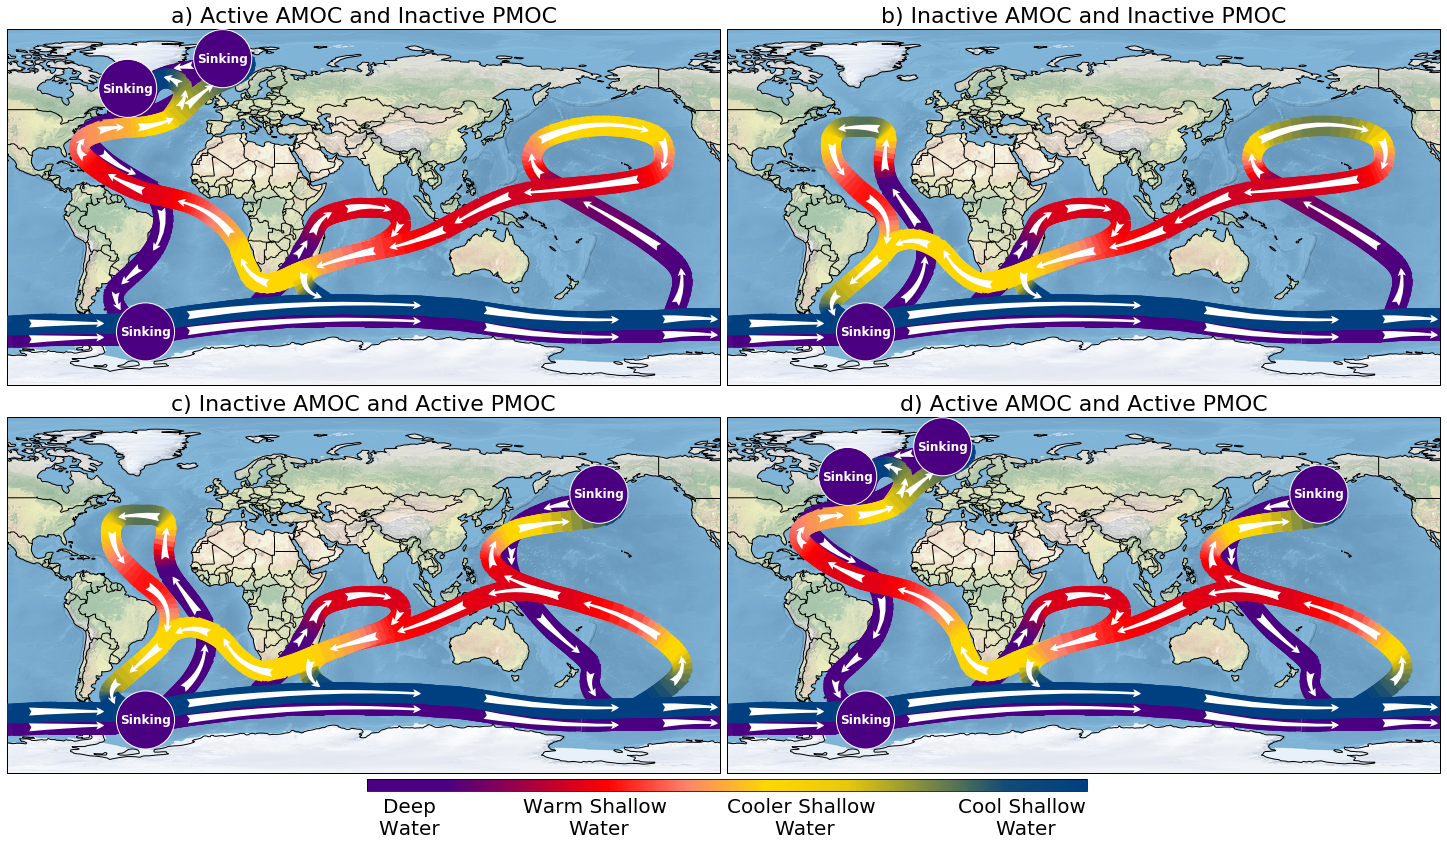

In [10]:
indigo_cmap = ({0.0:  'indigo',
                1.0:  'indigo'})
indigo_cmap = make_colormap(indigo_cmap)
colors1 = indigo_cmap(np.linspace(0, 1, 1))
colors2 = moc_cmap(np.linspace(0, 1, 9))
colors = np.vstack((colors1, colors2))
tmpcmap = mcolors.LinearSegmentedColormap.from_list('colormap', colors)


fig = plt.figure(figsize=(20,11))

ax1 = plt.axes([0.0,0.50,0.495,0.475], projection=ccrs.PlateCarree(central_longitude=70.0))
ax3 = plt.axes([0.0,0.01,0.495,0.475], projection=ccrs.PlateCarree(central_longitude=70.0))
ax2 = plt.axes([0.5,0.50,0.495,0.475], projection=ccrs.PlateCarree(central_longitude=70.0))
ax4 = plt.axes([0.5,0.01,0.495,0.475], projection=ccrs.PlateCarree(central_longitude=70.0))

plot_a(ax1)
plot_b(ax2)
plot_c(ax3)
plot_d(ax4)

cb_ax = fig.add_axes([0.25, 0.0, 0.5, 0.015])

cb = mpl.colorbar.ColorbarBase(cb_ax, orientation='horizontal', 
                               cmap=tmpcmap,
                               norm=mpl.colors.Normalize(0, 7),
                               extend='neither',
                               ticks=[0.5,1,2.25,3,4.25,5,6.4,7])

cb.set_ticklabels(['Deep   \nWater   ', '', 'Warm Shallow \nWater', '', 'Cooler Shallow \nWater', '', 'Cool Shallow \nWater', ''])
cb.ax.tick_params(labelsize=20, bottom=False)

#plt.savefig(f"/glade/work/molina/DATA/temp_figs/moc_states.png", bbox_inches='tight', dpi=500)
plt.savefig(f"/glade/work/molina/DATA/temp_figs/moc_states.pdf", bbox_inches='tight', dpi=500)
plt.savefig(f"/glade/work/molina/DATA/temp_figs/moc_states.jpg", bbox_inches='tight', dpi=200)

plt.show()

### Extra stuff below

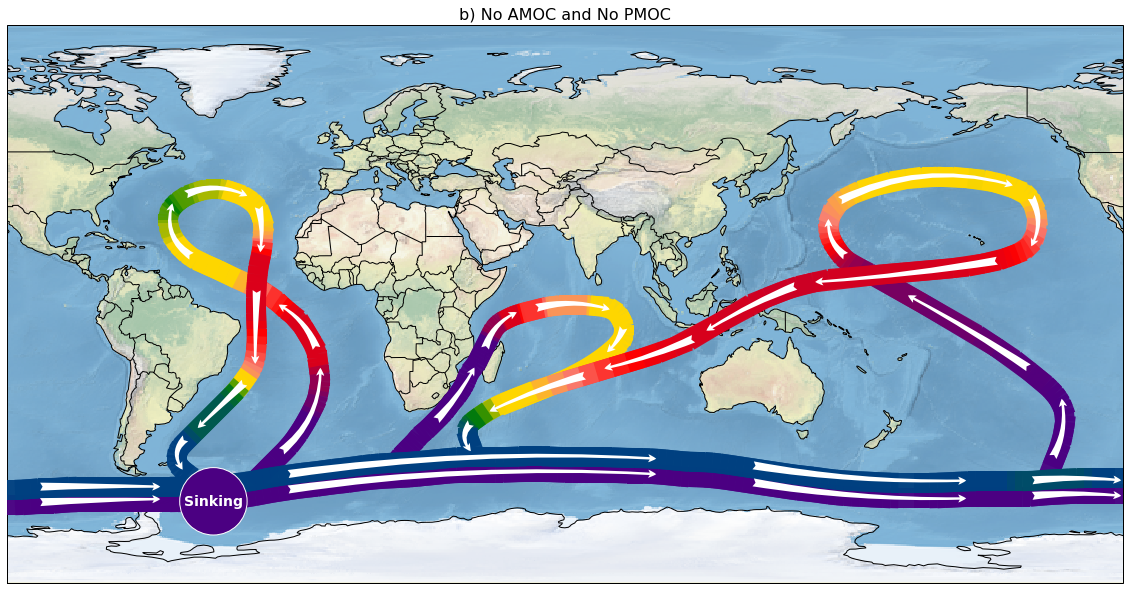

In [474]:
##################################################################################################################################################
##################################################################################################################################################

fig = plt.figure(figsize=(20,12))

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=70.0))

ax.set_title("b) No AMOC and No PMOC", fontsize=16)

ax.set_extent([-180, 180, -90, 90])

#########################################################################

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

#########################################################################


ax.text(-53, -65, 'Sinking', color='w', fontsize=14, fontweight='bold', zorder=100,
        bbox = dict(boxstyle='circle', facecolor='indigo', alpha=1., edgecolor='w'), transform=ccrs.Geodetic())


#########################################################################

#Arrows lines 
transform = ccrs.PlateCarree()._as_mpl_transform(ax)

##################################################################################################################################################
############################################# PACIFIC ############################################################################################
##################################################################################################################################################

#npac
ax.annotate('', xy=(145., 38.), xytext=(88., 33.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
        arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.2"))

#cpac
ax.annotate('', xy=(80., 7.), xytext=(140., 14.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
        arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.025"))

ax.annotate('', xy=(45., -9.), xytext=(75., 6.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
        arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.05"))

ax.annotate('', xy=(12., -21.), xytext=(42., -11.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
        arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.05"))

ax.annotate('', xy=(-25., -35.), xytext=(7., -23.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
        arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.05"))

ax.annotate('', xy=(-30., -48.), xytext=(-30., -38.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
        arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.5"))

#eastern npac
ax.annotate('', xy=(150., 18.), xytext=(150., 35.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
        arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.3"))

#wnpac
ax.annotate('', xy=(85., 28.), xytext=(91, 15.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
        arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.3"))

#pac
ax.annotate('', xy=(110., 3.), xytext=(150., -21.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
        arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.025"))

#spac
ax.annotate('', xy=(160., -30.), xytext=(157., -50.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
        arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.2"))

#########################################################################

pac_lons = np.array([-134, -132, -130, -129, -128.5, -130, -132., -135, -145, -157, 168, 162, 
                     159.5, 158, 156, 155, 154.75, 156.5, 160., 165, 175, -175, -165, 
                     -155, -148.5, -142, -140, -138, -137.5, -139, -142, -146, -150, -160, -170, 
                     155, 145, 140, 130, 110, 100, 90, 80, 70, 60, 50, 45, 40, 39, 38, 39, 41])

pac_lats = np.array([-55, -50, -45, -40, -36, -32, -29, -26, -18, -10, 10, 13, 15, 17, 20, 23, 
                     26, 31, 34, 36.5, 39.5, 41, 41, 40, 38.5, 36, 34, 30, 25, 20, 
                     17, 15.5, 14, 12, 11, 8, 5.75, 4, 0, -12, -16, -19, -22, -25, 
                     -28, -32, -34.5, -38, -39, -41, -44, -49])

pac_mocs = np.array([0,0,0,0,0,0,0,0,0,0.,0.,0.,0,2,2.,2.,2,2.,2.,2.,2.,3,5,4,3.5,3.,2.5,
                     1.5,1.5,1.,1.,1,1,1,1,1,1,0.5,0.5,1,1,1,1,2,2,2,2,6,6,6,6])

x = concat_array(pac_lons,longitude=True)
y = concat_array(pac_lats,longitude=False)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-3], points[3:]], axis=1)
norm = plt.Normalize(0,5)
lc = LineCollection(segments, cmap=moc_cmap, norm=norm, alpha=0.95, transform=ccrs.Geodetic())
#lc.set_array(concat_array(pac_mocs))
lc.set_array(gaussian_filter(concat_array(pac_mocs),6))
lc.set_linewidth(20)
lc.set_zorder(10)
line = ax.add_collection(lc)

##################################################################################################################################################
################################## ANTARCTIC #####################################################################################################
##################################################################################################################################################

#spac/ant
ax.annotate('', xy=(180., -57.), xytext=(150., -57.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
        arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.05"))

ax.annotate('', xy=(180., -62.), xytext=(150., -62.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
        arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.05"))

#spac/ant
ax.annotate('', xy=(130., -57.), xytext=(60., -52.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
        arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.05"))

ax.annotate('', xy=(130., -62.75), xytext=(60., -57.5), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
        arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.05"))

#spac/ant
ax.annotate('', xy=(30., -50.), xytext=(-90., -55.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
        arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.05"))

ax.annotate('', xy=(30., -55.), xytext=(-90., -60.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
        arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.05"))

#satl/ant
ax.annotate('', xy=(-130., -59.), xytext=(-170., -59.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
        arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.01"))

ax.annotate('', xy=(-130., -63.), xytext=(-170., -64.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
        arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.01"))

#########################################################################

ant_lons = np.array([-110,-105,-100,-95,-90,-85,-80,-75,-70,-65,-60,-55,-50,-45,-40,-35,-30,-25,
                     -20,-15,-10,-5,0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,
                       95,100,105,110,115,120,125,130,135,140,145,150,155,160,165,170,175,180])

ant_lats = np.array([-60,-60,-59.5,-59.5,-59,-59,-59,-59,-59,-59,-59,-59,-58.75,-58.5,-58.25,-57.75,-57.,-56, -55.25,
                     -54.5,-54.,-53.25,-52.75,-52.,-51.5,-51.25,-51,-50.5,-50,-49.5,-49.5,
                     -49.5,-49.5,-49.25,-49.25,-49.25,-49.5,-49.5,-49.5,-49.5,-49.75,-49.75,-50,-50.5,-51,
                     -51,-51.5,-52.25,-53,-53.75,-54.5,-55.25,-55.75,-56.5,-57,-57.25,-57.5,-57.75,-57.75])

anttop_mocs = np.array([5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,
                        5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5])

x = concat_array(ant_lons,longitude=False)
y = concat_array(ant_lats,longitude=False)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-3], points[3:]], axis=1)
norm = plt.Normalize(0,5)
lc = LineCollection(segments, cmap=moc_cmap, norm=norm, alpha=0.95, transform=ccrs.Geodetic())
lc.set_array(concat_array(anttop_mocs))
lc.set_linewidth(20)
lc.set_zorder(10)
line = ax.add_collection(lc)

#########################################################################

ant_lons2 = np.array([-179.99, -175,-170,-165,-160, -155, -150, -145, -140, 
                      -135, -130, -125, -120, -115, -110.01])

ant_lats2 = np.array([-57.75, -57.75,-57.75,-57.5,-57.25, -57.25, -57.25, -57.25, 
                      -57.25, -56.75, -56.5, -56.25, -56.25, -56.25, -56.25])

anttop_mocs2 = np.array([5,5,5,5,5,5,5,4.75,4.75,4.75,4.75,4.75,5])

x = concat_array(ant_lons2,longitude=True)
y = concat_array(ant_lats2,longitude=False)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-3], points[3:]], axis=1)
norm = plt.Normalize(0,5)
lc = LineCollection(segments, cmap=moc_cmap, norm=norm, alpha=0.95, transform=ccrs.Geodetic())
lc.set_array(concat_array(anttop_mocs2))
lc.set_linewidth(20)
lc.set_zorder(10)
line = ax.add_collection(lc)

#########################################################################

antbot_mocs = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                        0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])

x = concat_array(ant_lons,longitude=False)
y = concat_array(ant_lats-5,longitude=False)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-3], points[3:]], axis=1)
norm = plt.Normalize(0,5)
lc = LineCollection(segments, cmap=moc_cmap, norm=norm, alpha=0.95, transform=ccrs.Geodetic())
lc.set_array(concat_array(antbot_mocs))
lc.set_linewidth(20)
lc.set_zorder(9)
line = ax.add_collection(lc)

#########################################################################

antbot_mocs2 = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0])

x = concat_array(ant_lons2,longitude=True)
y = concat_array(ant_lats2-5,longitude=False)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-3], points[3:]], axis=1)
norm = plt.Normalize(0,5)
lc = LineCollection(segments, cmap=moc_cmap, norm=norm, alpha=0.95, transform=ccrs.Geodetic())
lc.set_array(concat_array(antbot_mocs2))
lc.set_linewidth(20)
lc.set_zorder(9)
line = ax.add_collection(lc)

##################################################################################################################################################
############################ ANTARCTIC TO INDIAN OCEAN ###########################################################################################
##################################################################################################################################################

#ant to africa
ax.annotate('', xy=(-29., -20.), xytext=(-42., -38.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
        arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.075"))

#africa to india
ax.annotate('', xy=(-15., -2.5), xytext=(-26., -15.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
        arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.25"))

#india
ax.annotate('', xy=(15., -2.), xytext=(-10., -1.5), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
        arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.15"))

#i-ocn to africa
ax.annotate('', xy=(13., -16.), xytext=(19., -7.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
        arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.15"))

##################################################################################################################################################
############################### ATLANTIC #########################################################################################################
##################################################################################################################################################

ind_lons = np.array([14,17,20,22,23,25,27,29,31,32.5,34,35,37,38,39,41,42,43,
                    44,45,46,47,48,49.,50.,51,52,53,54.5,56,58,60,62,64,66,68,70,72,74,76,78,80,
                    84,87,88,89,89,89,88,84,80,75,69,59,49])

ind_lats = np.array([-48,-44,-41,-39,-37.5,-36,-34,-32,-30,-28,-26,-25,-22,-20,-17,-15,-13,-11,-9,-7,-5,
                     -3,-2,-1,-0.5,0,0.5,1.,1.5,2.,2.5,3.,3.5,4,4.25,4.5,4.5,4.5,4.5,4.5,4.5,4.25,4.,
                     2,0.,-2,-3.,-5,-7.5,-11,-14.,-17,-20,-24,-28])

ind_mocs = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.5,0.5,0.5,0.5,1.,1.,1.,1.,1.,1.5,1.5,1.5,1.5,
                     2.,2.,2.,2.,2.,2,2,2.5,2.5,2.5,2.5,2.5,2.75,2.75,2.75,2.75,2.75,3,3.,3.,3,3,3,3,3,3,3,3.,3.,3])

x = concat_array(ind_lons,longitude=False)
y = concat_array(ind_lats-5,longitude=False)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-3], points[3:]], axis=1)
norm = plt.Normalize(0,5)
lc = LineCollection(segments, cmap=moc_cmap, norm=norm, alpha=0.95, transform=ccrs.Geodetic())
lc.set_array(concat_array(ind_mocs))
lc.set_linewidth(20)
lc.set_zorder(9)
line = ax.add_collection(lc)

#########################################################################


atl_lons = np.array([-31,-28,-25,-22,-19,-16,-13,-11.5,-10,-9.5,
                     -9,-9.5,-10,-10,-13,-16,-20,-23,-29,-36,-42,-49,-52,-55,
                     -57,-58,-58,-58,-57,-55,-52,-49,-46,-43,-40,-37,-34,-31,-29,
                     -28,-27,-27.75,-27.5,-28,-29,-29.5,-29.75,-29.75,-29.5,-29.5,
                     -30,-31,-33,-36,-39,-42,-45,-48,-51,-54,-55,-55.5,-55,-53,-50])

atl_lats = np.array([-53,-50,-47,-44,-41,-37,-32,-29,-26,-23,-20,-15,-12.5,-10,-5,0,3,6,10,
                     13,16,19,21,24,27,30,32,34,36,38,40,41,42,42,42,41,40,38,36,33,30,
                     27,25,21,17,12,7,2,-3,-8,-13,-16,-19,-23,-26,-29,-32,-35,-38,-41,
                     -42.5,-45,-47,-49,-51])

atl_mocs = np.array([0,0,0,0,0,0,0,0.25,0.25,0.5,0.5,1,1,1,1,1,1.25,1.5,2,2.5,3,3,3,3,
                     3.25,3.25,3.5,3.5,3.75,3.5,3.5,3.25,3.25,3.25,3,3,2.75,2.75,2.5,2.5,2.25,2.,
                     1.5,1,1,1,1,1,1.25,1.5,1.75,2,3,4,4.5,4.5,4.5,4.5,5,5,5,5,5,5,5])

x = concat_array(atl_lons,longitude=False)
y = concat_array(atl_lats-5,longitude=False)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-3], points[3:]], axis=1)
norm = plt.Normalize(0,5)
lc = LineCollection(segments, cmap=moc_cmap, norm=norm, alpha=0.95, transform=ccrs.Geodetic())
lc.set_array(concat_array(atl_mocs))
lc.set_linewidth(20)
lc.set_zorder(9)
line = ax.add_collection(lc)

#for i, j in zip(atl_lons, atl_lats-5):
#    ax.scatter(i,j,zorder=1000,transform=ccrs.Geodetic())

ax.stock_img()


ax.annotate('', xy=(-79., -20.), xytext=(-92., -48.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
        arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.25"))

ax.annotate('', xy=(-93., 0.), xytext=(-80., -15.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
        arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.2"))

ax.annotate('', xy=(-98.5, 16.), xytext=(-99., 32.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
        arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.1"))

ax.annotate('', xy=(-102., 34.5), xytext=(-123., 35.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
        arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.25"))

ax.annotate('', xy=(-126.5, 33.), xytext=(-120., 15.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
        arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.4"))

ax.annotate('', xy=(-100., -20.), xytext=(-99.5, 5.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
        arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.01"))

ax.annotate('', xy=(-119., -40.5), xytext=(-103., -25.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
        arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.0"))

ax.annotate('', xy=(-123., -54.), xytext=(-122., -43.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
        arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.5"))

#########################################################################
#########################################################################

#plt.tight_layout()
plt.show()

#########################################################################
#########################################################################

In [ ]:
#########################################################################

"""

#ant to africa
#ax.annotate('', xy=(-29., -20.), xytext=(-42., -38.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
#        arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.075"))

#africa to india
#ax.annotate('', xy=(-15., -2.5), xytext=(-26., -15.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
#        arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.25"))

#india
#ax.annotate('', xy=(15., -2.), xytext=(-10., -1.5), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
#        arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.15"))

#i-ocn to africa
#ax.annotate('', xy=(13., -16.), xytext=(19., -7.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
#        arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.15"))


ind_lons = np.array([14,17,20,22,23,25,27,29,31,32.5,34,35,37,38,39,41,42,43,
                    44,45,46,47,48,49.,50.,51,52,53,54.5,56,58,60,62,64,66,68,70,72,74,76,78,80,
                    84,87,88,89,89,89,88,84,80,75,69,59,49])

ind_lats = np.array([-48,-44,-41,-39,-37.5,-36,-34,-32,-30,-28,-26,-25,-22,-20,-17,-15,-13,-11,-9,-7,-5,
                     -3,-2,-1,-0.5,0,0.5,1.,1.5,2.,2.5,3.,3.5,4,4.25,4.5,4.5,4.5,4.5,4.5,4.5,4.25,4.,
                     2,0.,-2,-3.,-5,-7.5,-11,-14.,-17,-20,-24,-28])

ind_mocs = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.5,0.5,0.5,0.5,1.,1.,1.,1.,1.,1.5,1.5,1.5,1.5,
                     2.,2.,2.,2.,2.,2,2,2.5,2.5,2.5,2.5,2.5,2.75,2.75,2.75,2.75,2.75,3,3.,3.,3,3,3,3,3,3,3,3.,3.,3])

x = concat_array(ind_lons,longitude=False)
y = concat_array(ind_lats-5,longitude=False)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-2], points[2:]], axis=1)
norm = plt.Normalize(0,5)
lc = LineCollection(segments, cmap=moc_cmap, norm=norm, alpha=0.95, transform=ccrs.Geodetic())
lc.set_array(concat_array(ind_mocs))
lc.set_linewidth(20)
lc.set_zorder(9)
line = ax.add_collection(lc)

#ant to africa
ax.annotate('', xy=(-29., -20.), xytext=(-42., -38.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
        arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.075"))

#africa to india
ax.annotate('', xy=(-15., -2.5), xytext=(-26., -15.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
        arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.25"))

#india
ax.annotate('', xy=(15., -2.), xytext=(-10., -1.5), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
        arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.15"))

#i-ocn to africa
ax.annotate('', xy=(13., -16.), xytext=(19., -7.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
        arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.15"))

ax.annotate('', xy=(16., -20.), xytext=(52., -5.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
        arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=-0.025"))

ax.annotate('', xy=(-25., -35.), xytext=(7., -23.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
        arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.05"))

ax.annotate('', xy=(-30., -48.), xytext=(-30., -38.), zorder=100, xycoords='data', size=20, transform=ccrs.Geodetic(),
        arrowprops=dict(facecolor='w', ec = 'none', arrowstyle="fancy", connectionstyle="arc3,rad=0.5"))


#########################################################################


ind_lons = np.array([14,17,20,22,23,25,27,29,31,32.5,34,35,37,38,39,41,42,43,
                    44,45,46,47,48,49.,50.,51,52,53,54.5,56,58,60,62,64,66,68,70,72,74,76,78,80,
                    84,87,88,89,89,89,88,84,80,75,69])

ind_lats = np.array([-48,-44,-41,-39,-37.5,-36,-34,-32,-30,-28,-26,-25,-22,-20,-17,-15,-13,-11,-9,-7,-5,
                     -3,-2,-1,-0.5,0,0.5,1.,1.5,2.,2.5,3.,3.5,4,4.25,4.5,4.5,4.5,4.5,4.5,4.5,4.25,4.,
                     2,0.,-2,-3.,-5,-7.5,-11,-14.,-17,-20])

ind_mocs = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.5,0.5,0.5,0.5,1.,1.,1.,1.,1.,1.5,1.5,1.5,1.5,
                     2.,2.,2.,2.,2.,2,2,2.5,2.5,2.5,2.5,2.5,2.75,2.75,2.75,2.75,2.75,3,3.,3.,3,3,3,3,3,3,3,3.,3.,3])

x = concat_array(ind_lons,longitude=False)
y = concat_array(ind_lats-5,longitude=False)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-2], points[2:]], axis=1)
norm = plt.Normalize(0,5)
lc = LineCollection(segments, cmap=moc_cmap, norm=norm, alpha=0.95, transform=ccrs.Geodetic())
lc.set_array(concat_array(ind_mocs))
lc.set_linewidth(20)
lc.set_zorder(9)
line = ax.add_collection(lc)
"""